## Assignments

Now that you have some code to create your own populations, sample them, and compare the samples to the populations, it's time to experiment. Using your own Jupyter notebook, or a copy of the notebook above, reproduce the `pop1` and `pop2` populations and samples using numpy's binomial function. Specifically, create two binomially distributed populations with `n` equal to `10` and size equal to `10000`. The p-value of `pop1` should be `0.2` and the p-value of `pop2` should be `0.5`. Using a sample size of `100`, calculate the means and standard deviations of your samples.

For each of the following tasks, first write what you expect will happen, then code the changes and observe what does happen.  Discuss the results with your mentor.

 1. Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each.  Repeat this again, decreasing the size of your samples to 20.  What values change, and what remain the same?

 2. Change the probability value (`p` in the [NumPy documentation](https://docs.scipy.org/doc/numpy/reference/generated/numpy.random.binomial.html)) for `pop1` to 0.3, then take new samples and compute the t-statistic and p-value.  Then change the probability value p for group 1 to 0.4, and do it again.  What changes, and why?
 
 3. Change the distribution of your populations from binomial to a distribution of your choice.  Do the sample mean values still accurately represent the population values?

When you've given it a try, you can find a sample solution [here](https://github.com/Thinkful-Ed/data-201-resources/blob/master/solutions/Prep%20course/3.3.7.ipynb).


### Problem 1: 

Increase the size of your samples from 100 to 1000, then calculate the means and standard deviations for your new samples and create histograms for each. Repeat this again, decreasing the size of your samples to 20. What values change, and what remain the same?

What I expect will happen: 
I expect means and standard deviations to change but to stay in the same ballpark.  The sample means should be reliably closer to the population mean for the higher sample sizes.   

In [57]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
%matplotlib inline

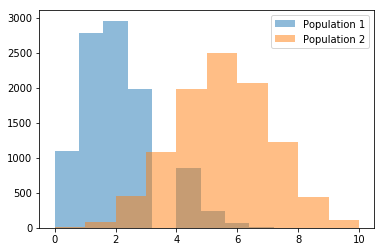

In [58]:
pop1 = np.random.binomial(10, 0.2, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

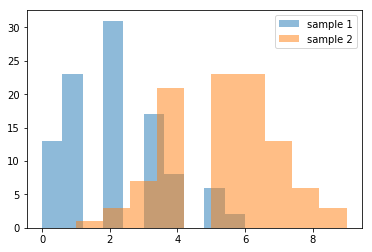

In [59]:
#pasting from above for easy reference - sample size = 100

sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [60]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

2.1
5.31
1.445683229480096
1.610558909198915
3.2099999999999995


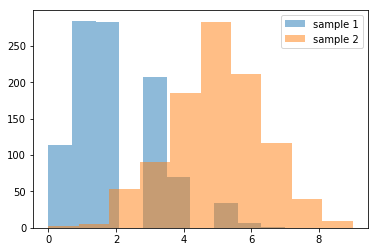

In [61]:
#changing sample size to 1000

sample1 = np.random.choice(pop1, 1000, replace=True)
sample2 = np.random.choice(pop2, 1000, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [62]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

1.965
5.042
1.2859918351218254
1.5453918596912566
3.077


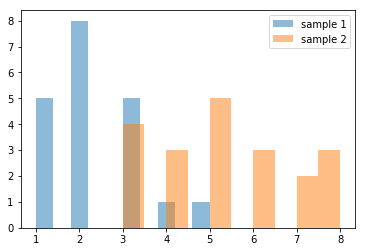

In [63]:
#changing sample size to 20

sample1 = np.random.choice(pop1, 20, replace=True)
sample2 = np.random.choice(pop2, 20, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [64]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

2.25
5.25
1.0428326807307104
1.6695807857064
3.0


### Problem 2: 
Change the probability value (p in the NumPy documentation) for pop1 to 0.3, then take new samples and compute the t-statistic and p-value. Then change the probability value p for group 1 to 0.4, and do it again. What changes, and why?

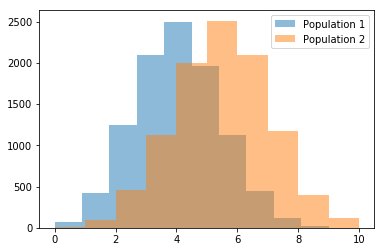

In [65]:
pop1 = np.random.binomial(10, 0.4, 10000)
pop2 = np.random.binomial(10,0.5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

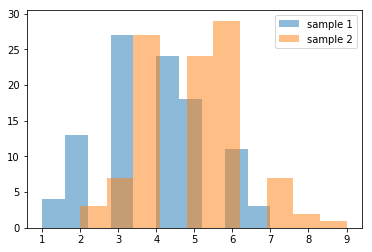

In [66]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [67]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

3.84
5.03
1.4192955999368138
1.3149524706239384
1.1900000000000004


In [68]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

6.150466291947945


In [69]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=6.119636692835941, pvalue=4.978488014581968e-09)


The t value shrinks and the p-value grows as the distributions of the two underying populations overlap more and more. 

### Problem 3:
Change the distribution of your populations from binomial to a distribution of your choice. Do the sample mean values still accurately represent the population values?

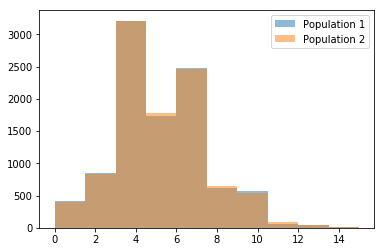

In [70]:
pop1 = np.random.poisson(5, 10000)
pop2 = np.random.poisson(5, 10000) 

# Let’s make histograms for the two groups. 

plt.hist(pop1, alpha=0.5, label='Population 1') 
plt.hist(pop2, alpha=0.5, label='Population 2') 
plt.legend(loc='upper right') 
plt.show()

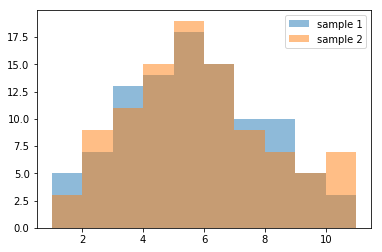

In [71]:
sample1 = np.random.choice(pop1, 100, replace=True)
sample2 = np.random.choice(pop2, 100, replace=True)

plt.hist(sample1, alpha=0.5, label='sample 1') 
plt.hist(sample2, alpha=0.5, label='sample 2') 
plt.legend(loc='upper right') 
plt.show()

In [72]:
print(sample1.mean())
print(sample2.mean())
print(sample1.std())
print(sample2.std())

# Compute the difference between the two sample means.
diff=sample2.mean( ) -sample1.mean()
print(diff)

5.21
5.37
2.294754888871576
2.423447956940689
0.16000000000000014


In [73]:
size = np.array([len(sample1), len(sample2)])
sd = np.array([sample1.std(), sample2.std()])

# The squared standard deviations are divided by the sample size and summed, then we take
# the square root of the sum. 
diff_se = (sum(sd ** 2 / size)) ** 0.5  

#The difference between the means divided by the standard error: T-value.  
print(diff/diff_se)

0.4793987316512105


In [56]:
from scipy.stats import ttest_ind
print(ttest_ind(sample2, sample1, equal_var=False))

Ttest_indResult(statistic=-0.2542453216241592, pvalue=0.7995699591477787)
